In [11]:
file_path = 'C:\\Users\\billa\\Desktop\\data mining\\loans.csv'
loans_data = pd.read_csv(file_path)

# Display the first few rows
print(loans_data.head())


   client_id loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
0      46109      home        13672       0    10243   4/16/2002  12/20/2003   
1      46109    credit         9794       0    10984  10/21/2003   7/17/2005   
2      46109      home        12734       1    10990    2/1/2006    7/5/2007   
3      46109      cash        12518       1    10596   12/8/2010    5/5/2013   
4      46109    credit        14049       1    11415    7/7/2010   5/21/2012   

   rate  
0  2.15  
1  1.25  
2  0.68  
3  1.24  
4  3.13  


In [17]:
import pandas as pd

# Correct file path (adjust as needed)
file_path = r'C:\Users\billa\Desktop\data mining\loans.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Check the first few rows to ensure the data loaded correctly
print(data.head())


   client_id loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
0      46109      home        13672       0    10243   4/16/2002  12/20/2003   
1      46109    credit         9794       0    10984  10/21/2003   7/17/2005   
2      46109      home        12734       1    10990    2/1/2006    7/5/2007   
3      46109      cash        12518       1    10596   12/8/2010    5/5/2013   
4      46109    credit        14049       1    11415    7/7/2010   5/21/2012   

   rate  
0  2.15  
1  1.25  
2  0.68  
3  1.24  
4  3.13  


In [19]:
print(data.columns)


Index(['client_id', 'loan_type', 'loan_amount', 'repaid', 'loan_id',
       'loan_start', 'loan_end', 'rate'],
      dtype='object')


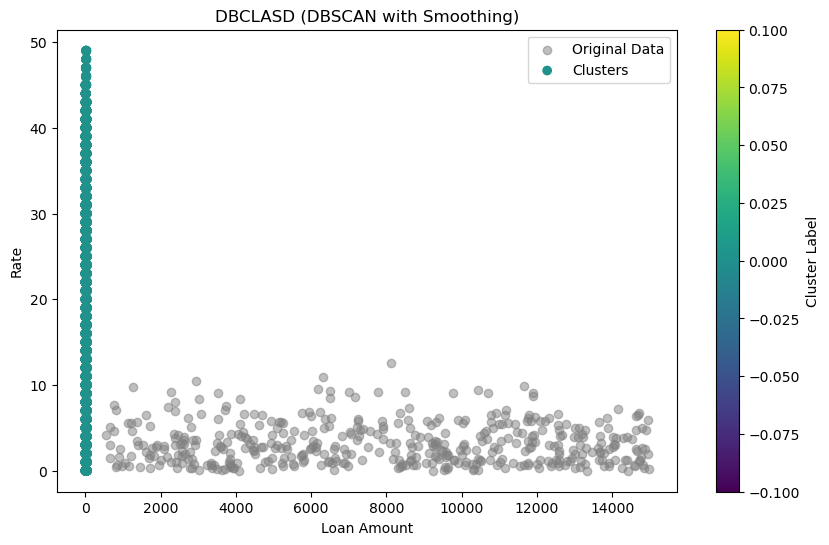

In [21]:
from sklearn.cluster import DBSCAN
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt

# Select relevant numerical features for clustering
features = data[['loan_amount', 'rate']].dropna()

# Convert to numpy array for processing
raw_data = features.to_numpy()

# Gaussian smoothing (smoothing step)
x = raw_data[:, 0]
y = raw_data[:, 1]
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
smoothed_hist = gaussian_filter(hist, sigma=1)

# Extract coordinates of non-zero smoothed values (data points after smoothing)
smoothed_data = np.column_stack(np.nonzero(smoothed_hist))

# DBSCAN clustering on smoothed data
dbscan = DBSCAN(eps=2, min_samples=5)
labels = dbscan.fit_predict(smoothed_data)

# Visualization of results
plt.figure(figsize=(10, 6))
plt.scatter(raw_data[:, 0], raw_data[:, 1], c='gray', alpha=0.5, label="Original Data")
plt.scatter(smoothed_data[:, 0], smoothed_data[:, 1], c=labels, cmap='viridis', label="Clusters")
plt.colorbar(label="Cluster Label")
plt.xlabel('Loan Amount')
plt.ylabel('Rate')
plt.title("DBCLASD (DBSCAN with Smoothing)")
plt.legend()
plt.show()
